Libraries

In [36]:
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as pl

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Loading data

In [37]:
# Load lines from mfeat-pix.txt
features = open('mfeat-pix.txt').readlines()

# Create labels for each line, 0-9 for each 200 lines
labels = []
for i in range(10):
  for j in range(200):
    labels.append(i)
labels = np.array(labels)

# Convert each line to a numpy array
for i in range(len(features)):
  features[i] = np.array(features[i].split()).astype('float')
  # Normalize
  features[i] = features[i] / 6
features = np.array(features)

Split data into train and test

In [38]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=40)

Logistic regression model

In [39]:
model = LogisticRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

score = model.score(X_test, y_test)
print(score)

0.9725


/Users/cia/PycharmProjects/MLfinal/ven/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


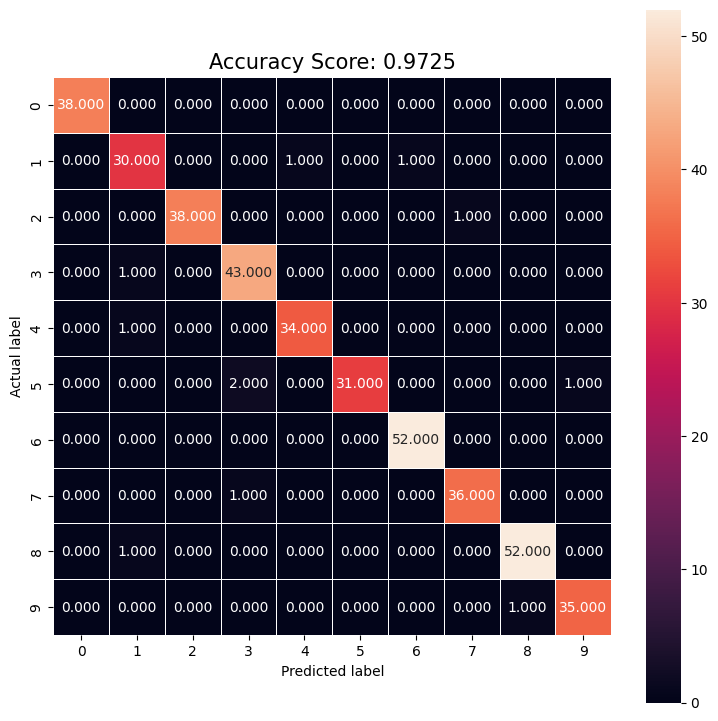

In [41]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);